# Applications of Eigenvalues and Eigenvectors

In this notebook, we explore further applications of eigenvalues and eigenvectors; namely:
- Spectral Clustering
- Singular Value Decomposition

## Spectral Clustering

We'll start with *spectral clustering*. This is an unsupervised learning algorithm for determining "clusters" in a dataset. We'll start with finding clusters or communities in a graph. Let's import some packages --- notice that we are using a package we haven't used before. The package `networkx` is useful for manipulating graphs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx #For graph analysis

### Creating a Toy Dataset

Let's create a graph object in `networkx` to experiment with. We'll purposefully create a graph with some apparent communities. The package contains several graph generator functions---we'll start with a `connected_caveman_graph`, which is a highly regular graph with community structure, then drop some nodes and add edges to "randomize" it a bit.

In [2]:
G = nx.connected_caveman_graph(3,8) # Create an initial community-structured graph
G.remove_nodes_from([1,3,20]) # Drop some random nodes
G.add_edges_from([(2,8),(4,9),(12,18)]) # Add some Random Edges

There are many methods for visualizing graphs---i.e., drawing nodes in the plane and line segments connecting them when an edge is present. I like the 'Kamada-Kawai' layout, which places the nodes using a 'force-directed' algorithm.

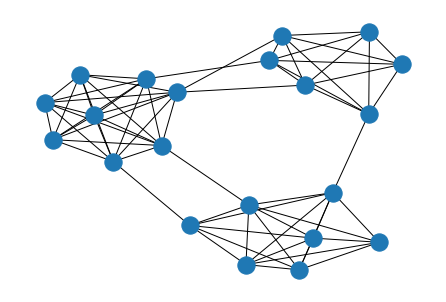

In [3]:
nx.draw_kamada_kawai(G)

From the picture, we intuitively see 'communities' in the graph. Observe that the communities here are not as strict as the *connected components* that we discussed in the last class. This brings us to our 

**Goal:** Find an algorithm to discover the communities in a given graph.

### Matrices Associated to a Graph

Recall from class that there are several matrices we can associate to a graph. We'll use `networkx` to generate them for our example.

Here's the **adjacency matrix**.

In [4]:
A = nx.to_numpy_array(G)
print(f'The number of nodes of G is {len(G)}. The size of A is {A.shape[0]} by {A.shape[1]}')
print()
print(A)

The number of nodes of G is 21. The size of A is 21 by 21

[[0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 

For larger matrices, it is frequently not so useful to look at the numbers printed out. It can be more informative to look at the matrix as an image, with entries colored according to their numerical value.

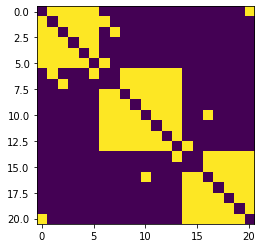

In [5]:
plt.imshow(A)
plt.show()

We also have the **incidence matrix**. 

Note: the `incidence_matrix` function returns an object which is of 'sparse matrix' data type. We use the attribute `.todense` to turn it into a normal `numpy` array. 

Also, the matrix returned by the function is the transpose of how we defined it in class. To fix this, we use `.T` to take a transpose. This is not necessary, but is only being done for consistency!

In [6]:
B = nx.incidence_matrix(G, oriented = True).todense().T

The number of nodes of G is 21 and the number of edges of G is 68. The size of B is 68 by 21



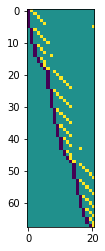

In [7]:
print(f'The number of nodes of G is {len(G)} and the number of edges of G is {len(G.edges())}. The size of B is {B.shape[0]} by {B.shape[1]}')
print()
plt.imshow(B)
plt.show()

Finally, the **graph Laplacian**.

In [8]:
L = nx.laplacian_matrix(G).todense()

The number of nodes of G is 21. The size of L is 21 by 21



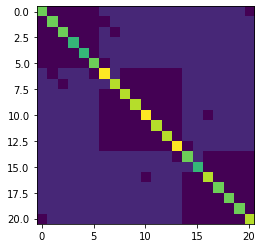

In [9]:
print(f'The number of nodes of G is {len(G)}. The size of L is {L.shape[0]} by {L.shape[1]}')
print()
plt.imshow(L)
plt.show()

Recall from class that we had two formulas for $\mathbf{L}$. Either
$$
\mathbf{L} = \mathbf{B}^T \mathbf{B}
$$
or 
$$
\mathbf{L} = \mathbf{D} - \mathbf{A},
$$
where $\mathbf{D}$ is the **degree matrix** for $G$. Let's test and make sure that our formulas agree with the output of the function above.

The Laplacian, using the first formula:



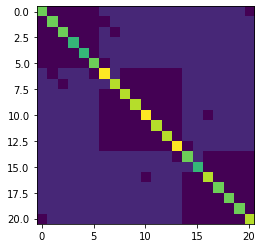

The largest entry of L - B^T B is 0.0.


In [10]:
## First formula
L_test_1 = B.T@B

print('The Laplacian, using the first formula:')
print()
plt.imshow(L_test_1)
plt.show()

worst_error = np.max(np.abs(L - L_test_1))
print(f'The largest entry of L - B^T B is {worst_error}.')

The degree matrix:



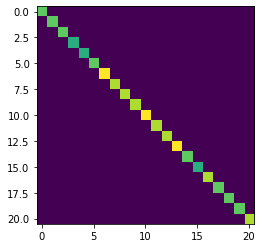

The Laplacian, using the second formula:



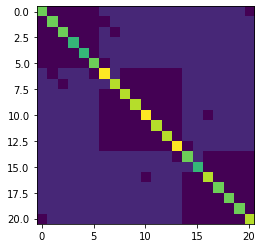

The largest entry of L - B^T B is 0.0.


In [11]:
## Second formula
D = np.diag([G.degree(i) for i in G.nodes()])
print('The degree matrix:')
print()
plt.imshow(D)
plt.show()

L_test_2 = D - A

print('The Laplacian, using the second formula:')
print()
plt.imshow(L_test_2)
plt.show()

worst_error = np.max(np.abs(L - L_test_2))
print(f'The largest entry of L - B^T B is {worst_error}.')

### Spectrum of the Laplacian

Now we will look at the *spectrum* of the Laplacian --- i.e., its sorted list of eigenvalues --- and show how it relates to community detection in the graph.

The following code computes the eigenvalues and eigenvectors of the Laplacian. The eigenvalues are sorted in *increasing* order, and eigenvectors are sorted the same way (i.e. the first column of `vects` corresponds to the first entry of `vals`).

In [12]:
vals, vects = np.linalg.eigh(L)

In [13]:
print('The eigenvalues of L:')
print(vals)

The eigenvalues of L:
[5.03481805e-15 5.17097381e-01 8.86364631e-01 5.34156791e+00
 6.00000000e+00 6.00000000e+00 6.23055595e+00 6.48504334e+00
 7.00000000e+00 7.00000000e+00 7.00000000e+00 7.17421426e+00
 7.36820608e+00 8.00000000e+00 8.00000000e+00 8.00000000e+00
 8.29721856e+00 8.37634152e+00 8.97024962e+00 9.54455726e+00
 9.80858349e+00]


Observe that we have exactly one eigenvalue which is equal to zero (up to numerical error). This agrees with the theory that we developed last time: the number of zero eigenvalues correspons to the number of path components in the graph, and there is one path component in our example.

However, there are a few which are 'near' zero. Let's plot the eigenvalues to see the trend.

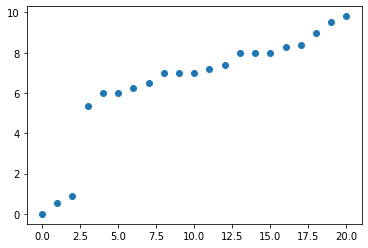

In [14]:
plt.plot(vals,'o')
plt.show()

Observe that there are three eigenvalues 'near' zero, then a big jump. This corresponds to the fact that there are three communities in our example graph. This jump is what we look for when doing community detection!

### Community Detection: Hierarchical Approach

The eigenvectors of $L$ also tell us about the community structure.

For a graph with one path component, the first eigenvector will always be constant:

In [15]:
vects[:,0]

matrix([[-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789],
        [-0.21821789]])

The second eigenvector is called the *Fiedler vector* for the graph. It tells us how to split the graph into two communities!

In [16]:
vects[:,1]

matrix([[ 0.14798294],
        [ 0.20995492],
        [ 0.20823315],
        [ 0.22283883],
        [ 0.22283883],
        [ 0.20995492],
        [ 0.13931374],
        [ 0.12815161],
        [ 0.11894136],
        [ 0.11894136],
        [ 0.07279754],
        [ 0.11894136],
        [ 0.11894136],
        [ 0.07399829],
        [-0.2623063 ],
        [-0.33732569],
        [-0.27249221],
        [-0.32575381],
        [-0.32575381],
        [-0.32575381],
        [-0.26244458]])

The important thing to notice is the split between positive and negative entries. We can use this split to color the nodes of our graph.

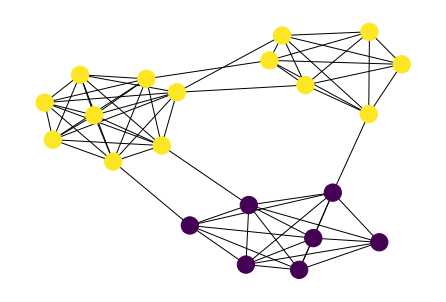

In [17]:
colors = list(np.array(np.abs(np.ceil(vects[:,1])).T).flatten())

nx.draw_kamada_kawai(G,node_color = colors)

Since we suspect that there are three communities, based on eigenvalue information, we could keep the larger community in this picture and run the same process.

**However** let's forgo this approach and use a more common one:

### Community Detection: Embedding Approach

In this approach, we use the eigenvectors to embed the nodes of our graph into some Euclidean space.

Consider the second and third columns of our eigenvector matrix:

In [18]:
print(vects[:,1:3])

[[ 0.14798294  0.28360257]
 [ 0.20995492  0.24249246]
 [ 0.20823315  0.23143177]
 [ 0.22283883  0.32117417]
 [ 0.22283883  0.32117417]
 [ 0.20995492  0.24249246]
 [ 0.13931374 -0.15985712]
 [ 0.12815161 -0.22747814]
 [ 0.11894136 -0.28248361]
 [ 0.11894136 -0.28248361]
 [ 0.07279754 -0.24556165]
 [ 0.11894136 -0.28248361]
 [ 0.11894136 -0.28248361]
 [ 0.07399829 -0.24665407]
 [-0.2623063   0.00822426]
 [-0.33732569  0.07018365]
 [-0.27249221  0.01708777]
 [-0.32575381  0.06004902]
 [-0.32575381  0.06004902]
 [-0.32575381  0.06004902]
 [-0.26244458  0.09147509]]


The idea is to treat this as a 'data matrix'. Each row is a sample and each column is a feature. This turns the graph into a dataset of vectors, which is much easier to handle than graph data! Let's plot our dataset as a scatterplot in 2D.

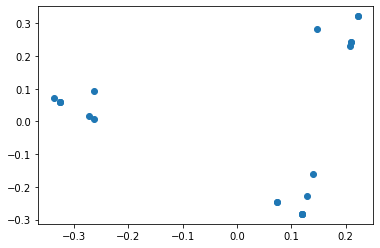

In [19]:
xs = np.array(vects[:,1].T).flatten()
ys = np.array(vects[:,2].T).flatten()

plt.scatter(xs, ys)

plt.show()

We see that there are three apparent clusters in this vector dataset!

We can add another column (the next eigenvector) and get a dataset in 3D, which also has three clusters.

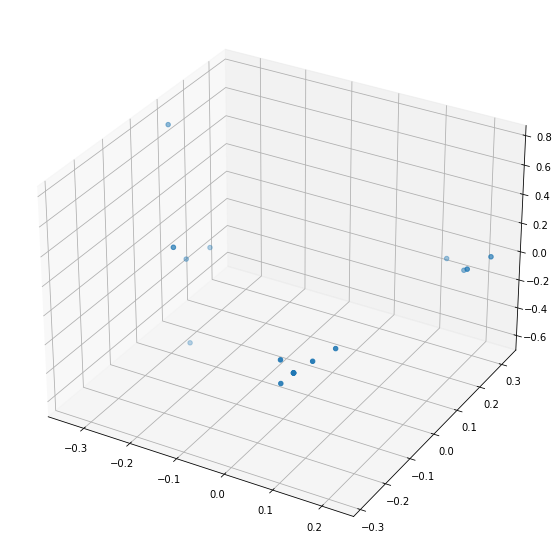

In [20]:
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

xs = vects[:,1]
ys = vects[:,2]
zs = vects[:,3]
ax.scatter(xs, ys, zs)

plt.show()

There are many standard algorithms for clustering datasets in a vector space --- we haven't seen these in class yet, but we may later in the semester. These can now be applied to the vector space data that we've engineered from the graph. This can then be translated into community detection in the original graph.

As an example, let's use $k$-Means Clustering on the 3D embedded data, with $k=3$ (this is the target number clusters, which we can infer from the observation that $L$ has three small eigenvalues). We'll apply the `sklearn` version of $k$-Means.

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters = 3)
data = vects[:,1:4]
kmeans.fit(data)

KMeans(n_clusters=3)

The clustering found by $k$-Means is encoded in the `labels_` attribute.

In [23]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

We can now use these labels to color our graph. 

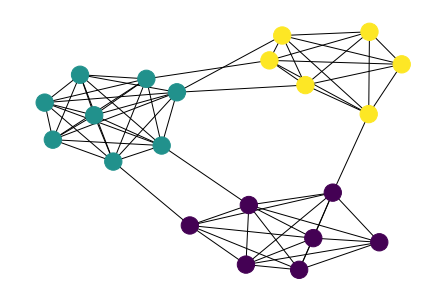

In [24]:
colors = list(kmeans.labels_)

nx.draw_kamada_kawai(G,node_color = colors)

It looks like it did a good job picking out communities!

### Spectral Clustering for a Dataset of Vectors

Spectral Clustering can be applied even if we start with data that doesn't live on a graph. Consider the following 'toy' dataset from `sklearn`.

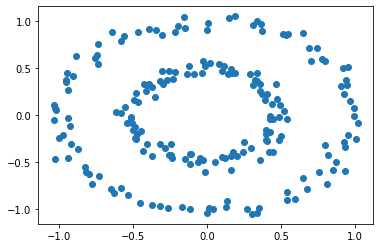

In [25]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples = 200, noise = 0.05,factor = 0.5)

plt.scatter(X[:,0],X[:,1])
plt.show()

Visually, there seem to be two 'clusters' in this dataset. Since we are starting with data in a vector space (not a graph), we could apply $k$-Means clustering directly to try to obtain a clustering.

In [26]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

KMeans(n_clusters=2)

Using our cluster labels to color the data, we see that it did a bad job. This is due to the nature of the $k$-Means algorithm, which is easily confused by the 'nested' nature of the data in this picture.

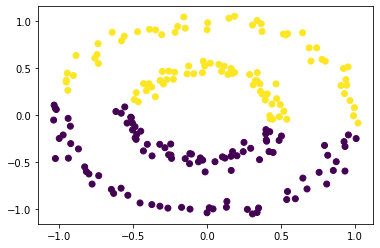

In [27]:
plt.scatter(X[:,0],X[:,1],c = list(kmeans.labels_))
plt.show()

We can use spectral clustering to do a better job, but first we need a graph!

On option is to construct a $k$-neighbors graph (this is a *different* $k$ than the one in $k$-Means!). After choosing a $k$, we connect data point $x$ to datapoint $y$ if $y$ is one of the $k$ closest points to $x$ in the dataset. Code for constructing the graph and turning it into a `networkx` graph object is given below.

Let's take $k = 5$.

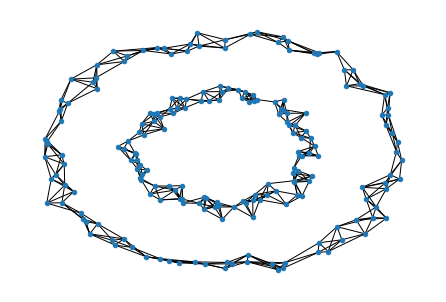

In [28]:
from sklearn.neighbors import kneighbors_graph

A = kneighbors_graph(X, n_neighbors=5).todense() #kneighbors_graph returns a sparse matrix

G = nx.from_numpy_array(A)

pos = {i:X[i,:] for i in G.nodes} # Set node positions for drawing the graph
nx.draw(G,pos,node_size = 20) # Draw the graph with these positions

Now, let's run through the process of spectral clustering described above.

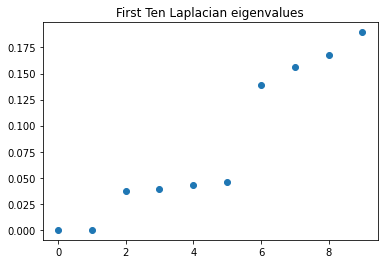

In [29]:
L = nx.laplacian_matrix(G).todense()
vals, vects = np.linalg.eigh(L)

plt.plot(vals[:10],'o')
plt.title('First Ten Laplacian eigenvalues')
plt.show()

For this example, we have two zero eigenvalues, indicating that the graph actually has two path components. Let's run the spectral embedding using the first 3 eigenvectors, then do $k$-means clustering with $k=2$. 

We will then plot our original data with coloring determined by the cluster labels.

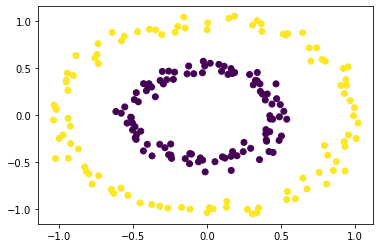

In [30]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(vects[:,:2])

plt.scatter(X[:,0],X[:,1],c = list(kmeans.labels_))
plt.show()

Here, the clustering agrees with our intuition!

To finish off this section, we should mention that the whole spectral clustering pipeline is implemented as an `sklearn` model. Here is the code for running the above example using `sklearn`. 

/Users/needham/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


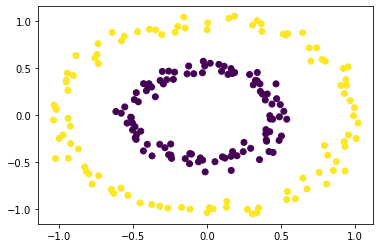

In [31]:
from sklearn.cluster import SpectralClustering

SC = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors')
SC.fit(X)

plt.scatter(X[:,0],X[:,1],c = list(SC.labels_))
plt.show()

## Singular Value Decomposition

Here's a useful theorem about general rectangular matrices:

**Theorem (Singular Value Decomposition)**

Any matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$ (with, say, $m \geq n$) can be decomposed as 
$$
\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T,
$$
where $\mathbf{U} \in \mathbb{R}^{m \times m}$ and $\mathbf{V} \in \mathbb{R}^{n \times n}$ are *orthogonal matrices* (their columns for an orthonormal basis for their respective vector spaces) and $\mathbf{\Sigma}$ has a block diagonal structure.

In particular, the columns of $\mathbf{V}$ are eigenvectors of $\mathbf{A}^T \mathbf{A}$, one block of $\mathbf{\Sigma}$ contains square roots of the (real, non-negative) eigenvalues of $\mathbf{A}^T \mathbf{A}$ and the columns of $\mathbf{U}$ are eigenvectors of $\mathbf{A}\mathbf{A}^T$.

This is called the *Singular Value Decomposition (SVD)* of $\mathbf{A}$.

We will now show how to use the SVD for matching point clouds in a geometric data analysis context.

### Loading and Processing Data

We'll use a dataset consisting of point clouds sampled from 3D models of horse figures. The models in the dataset come from an animation of a horse running.

In [33]:
path='./data/meshes.npy'
tab_obj=np.load(path)

Let's take a look at an example.

In [34]:
idx = 5
X=tab_obj[idx]

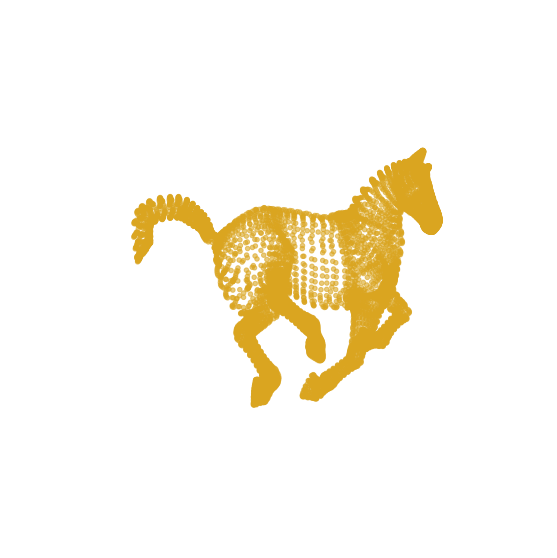

In [35]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,2],X[:,1], marker='o', s=20, c='goldenrod', alpha=0.6)
ax.view_init(elev=10., azim=360)
ax.set_axis_off()

### Point Cloud Registration

In this section, we aim to address the the

**Point Cloud Registration Problem:** Given two 3D point cloud models, how do we optimally align the point clouds in space, as a processing step for downstream analysis?

The data that we're using is already aligned pretty well, so let's write a function to introduce adversarial rotations.

In [36]:
def randomlyRotatePointCloud(X, angle_bound = np.pi/6):
    
    theta1 = np.random.rand()*angle_bound
    A1 = np.array([[1,0,0],
                  [0, np.cos(theta1),-np.sin(theta1)],
                   [0, np.sin(theta1),np.cos(theta1)]])
    theta2 = np.random.rand()*angle_bound
    A2 = np.array([[np.cos(theta2),0,-np.sin(theta2)],
                  [0, 1, 0],
                   [np.sin(theta2), 0,np.cos(theta2)]])
    theta3 = np.random.rand()*angle_bound
    A3 = np.array([[np.cos(theta3),-np.sin(theta3),0],
                  [np.sin(theta3),np.cos(theta3) ,0],
                   [0,0 ,1]])
    
    X_rot = X@A3@A2@A1
    
    return X_rot

Testing our function:

In [37]:
Y = randomlyRotatePointCloud(X)

# The following centers the pointclouds to help with visualization
X -= np.mean(X,axis = 0)
Y -= np.mean(Y,axis = 0)

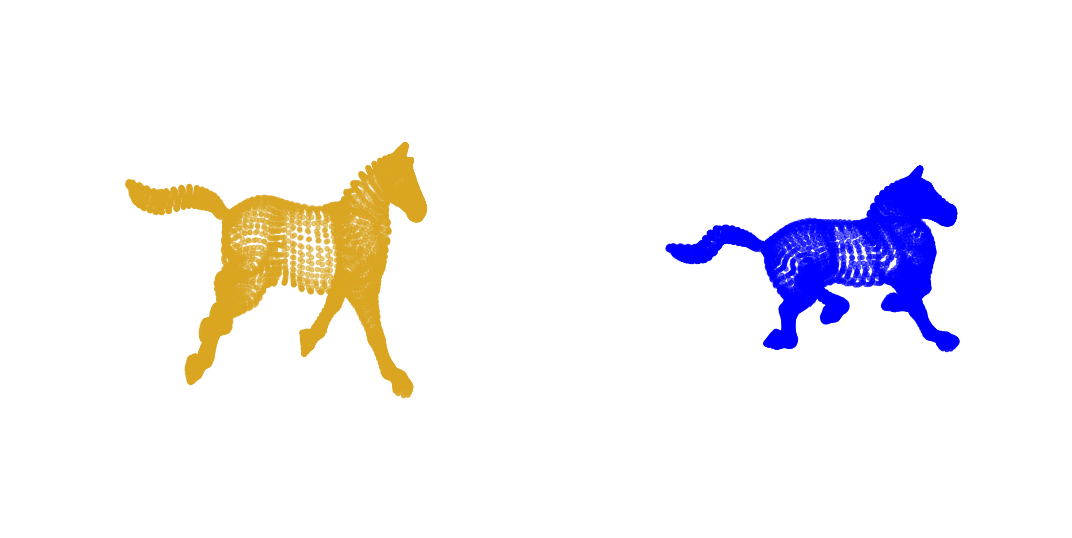

In [43]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:,0],X[:,2],X[:,1], marker='o', s=20, c='goldenrod', alpha=0.6)
ax.view_init(elev=10., azim=360)
ax.set_axis_off()

ax = fig.add_subplot(122, projection='3d')
ax.scatter(Y[:,0],Y[:,2],Y[:,1], marker='o', s=20, c='blue', alpha=0.6)
ax.view_init(elev=10., azim=360)
ax.set_axis_off()

plt.tight_layout()

Plotting the point clouds on top of one another shows the misalignment.

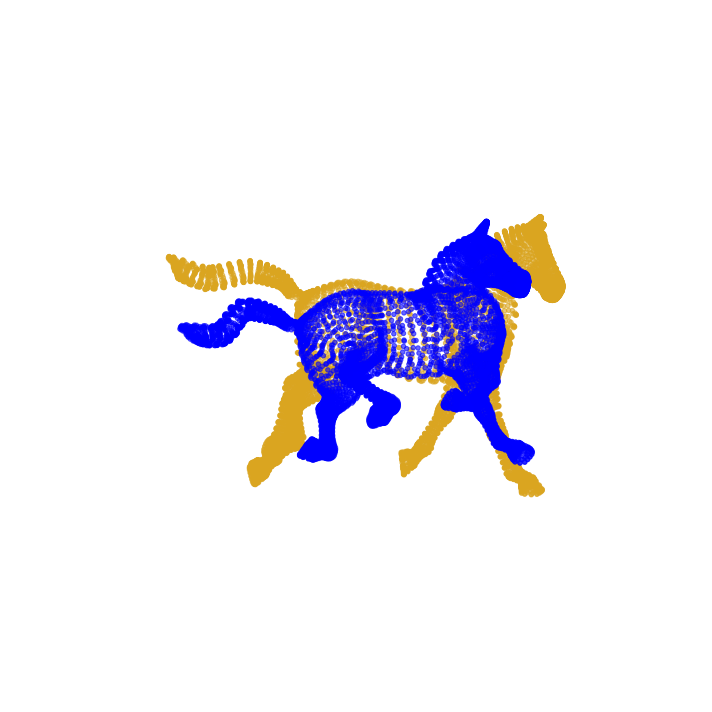

In [45]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,2],X[:,1], marker='o', s=20, c='goldenrod', alpha=0.6)
ax.scatter(Y[:,0],Y[:,2],Y[:,1], marker='o', s=20, c='blue', alpha=0.6)
ax.view_init(elev=10., azim=360)
ax.set_axis_off()

plt.tight_layout()

So how do we do the alignment?

**Answer:** Using Singular Value Decompositions (SVDs)!

Here is the procedure:

- Given two 3D point clouds with the same number points $n$ that are already in correspondence$^{**}$ consider them as matrices $\mathbf{X},\mathbf{Y} \in \mathbb{R}^{n \times 3}$.

- Construct the matrix $\mathbf{A} = \mathbf{X}^T\mathbf{Y} \in \mathbb{R}^{n \times n}$. 

- Compute the SVD $\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$. 

- The optimal realignment of $\mathbf{Y}$ to $\mathbf{X}$ is given by $\mathbf{Y}\mathbf{V}\mathbf{U}^T$. 

$**$ Here, we are making a **big assumption:** we assume that the $i$th of the matrix $\mathbf{X}$ should really be in correspondence with the $i$th row of matrix $\mathbf{Y}$---i.e., we don't have a point on the nose of one horse in row 1 of $\mathbf{X}$, and a point on the tail of the other horse in row 1 of $\mathbf{Y}$. Time permitting, we will discuss ways in which this assumption can be removed.

Let's apply this to our example.

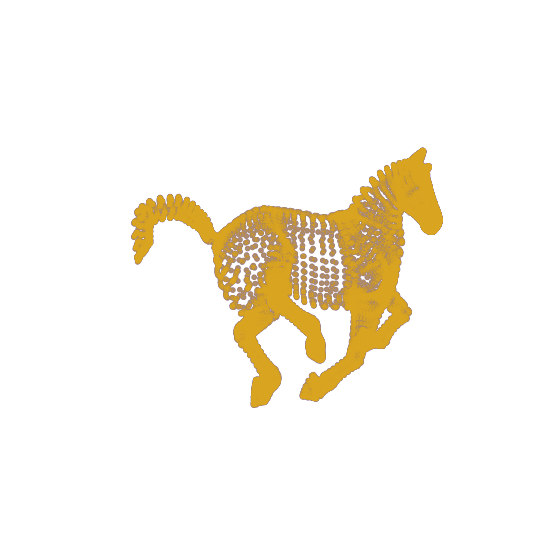

In [40]:
A = X.T@Y
U, Sigma, Vt = np.linalg.svd(A, full_matrices=True)

YRot = Y@Vt.T@U.T

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,2],X[:,1], marker='o', s=20, c='goldenrod', alpha=0.6)
ax.scatter(YRot[:,0],YRot[:,2],YRot[:,1], marker='o', s=20, c='blue', alpha=0.6)
ax.view_init(elev=10., azim=360)
ax.set_axis_off()

### Another Example

Let's try this when we don't have a copy of exactly the same horse.

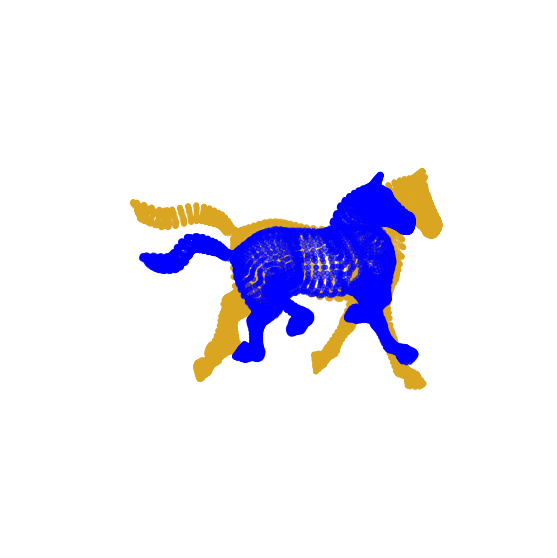

In [41]:
idx = 1
idy = 2

X=tab_obj[idx]
Y=tab_obj[idy]

Y = randomlyRotatePointCloud(Y)

# The following centers the pointclouds to help with visualization
X -= np.mean(X,axis = 0)
Y -= np.mean(Y,axis = 0)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,2],X[:,1], marker='o', s=20, c='goldenrod', alpha=0.6)
ax.scatter(Y[:,0],Y[:,2],Y[:,1], marker='o', s=20, c='blue', alpha=0.6)
ax.view_init(elev=10., azim=360)
ax.set_axis_off()

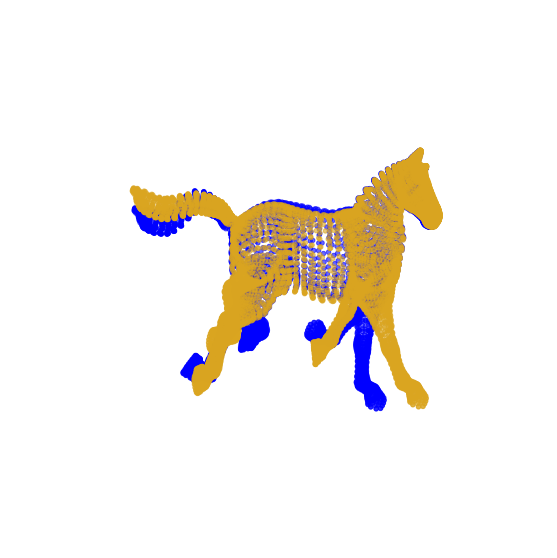

In [42]:
A = X.T@Y
U, Sigma, Vt = np.linalg.svd(A, full_matrices=True)

YRot = Y@Vt.T@U.T

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,2],X[:,1], marker='o', s=20, c='goldenrod', alpha=0.6)
ax.scatter(YRot[:,0],YRot[:,2],YRot[:,1], marker='o', s=20, c='blue', alpha=0.6)
ax.view_init(elev=10., azim=360)
ax.set_axis_off()